# **Machine Learning in Bioinformatics**

**Homework 3:**<br/>
!!! If you don't fill these fields, your homework does not count !!!<br/>
first name and last name : Monireh Safari
student number : 98201803

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`.<br/>
We highly recommend you to read each line of code carefully and try to 
understand what it exactly does.<br/>
Just alter the parts that is between green comments and specified for you. <br/>
Please do not change other parts.

In [39]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer 


### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label called target.
The original dataset labels are 0 and 1 and in the following code boxes we change it to -1 and 1.

In [2]:
cancer = load_breast_cancer()  ## change if the data set changed
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [41]:
cancer.target = np.where(cancer.target==0, -1, cancer.target)
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO:                                                                        #
# 1- Normalize tha data.                                                       #
# 2- using train_test_split package, split your data into 3 numpy array        #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 70%     test : 20%       validation : 10%                           #
################################################################################



# min-max no"target",axis = 1)
X = (X - X.min()) / (X.max() - X.min())
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.123, random_state=1)


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

70.12302284710017 %
70.12302284710017 %
20.035149384885763 %
20.035149384885763 %
9.84182776801406 %
9.84182776801406 %


# Ensemble Methods

## Problem 1. Bagging (15 points)


1 96.42857142857143 25


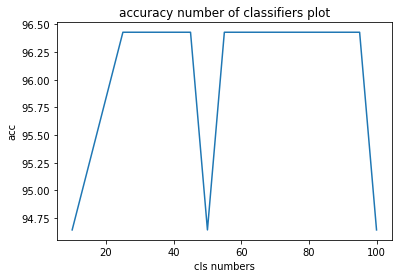

test accuracy :  95.614 % 


In [42]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
import sklearn


################################################################################
# TODO : initialize the base classifier. You can choose one of the classifiers #
# you have learned in this course.(SVM/Decision tree)                          #
# IMPORTANT: if you are using SVM as base classifier don't forget to add column#
# of '1' s for bias and be careful to use the right datset in next parts.      #
################################################################################
base_cls = DecisionTreeClassifier() 
  
##################################################################################
# TODO: Number of classifiers is a hyperparameter. Choose it by using validation #
# data to have the best accuracy                                                 #
# For different number of classifiers, train the model with training data and    #
# compute accuracy for validation data. Plot accuracy-number of classifiers plot.#
##################################################################################
num_cls_list = [10,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
seed = 10
accuracy = []
for num_cls in num_cls_list :
    model = BaggingClassifier(base_estimator = base_cls, 
                              n_estimators = num_cls, 
                              random_state = seed)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    acc = [1 if y_pred[i] == y_val[i] else 0 for i in range(len(y_val))]
    accuracy.append(sum(acc)/len(y_val) * 100)

best_num = np.argmax(np.asarray(accuracy))
print(best_num,accuracy[best_num],num_cls_list[best_num])

x = num_cls_list
y = accuracy
plt.plot(x, y)
plt.xlabel('cls numbers')
plt.ylabel('acc')
plt.title('accuracy number of classifiers plot')
plt.show()

################################################################################
# compute and report the accuracy for test data.                               #
################################################################################
model = BaggingClassifier(base_estimator = base_cls, 
                              n_estimators = num_cls_list[best_num], 
                              random_state = seed)
model.fit(X_train,y_train)

correct = 0
pred_test = model.predict(X_test)
for i,j in zip(y_test, pred_test) :
    if i == j :
        correct+=1
print("test accuracy : ", round(correct*100/len(y_test),3) ,"% ")


## Problem 2. Random Forest(25 points)</br>
In this part, you should write your own code to classify the data, using random forest from sklearn package in python.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
#################################################################################
# TODO:use the validation data to determine hyperparameters(number and depth of #
# trees) for the best accuracy                                                  # 
#################################################################################
depth = [1,2,3,4,5,6,7,8,9,10,12,15,20,30,40]
trees_number = [5,10,15,20,25,30,40]
best_acc = []
kfold = model_selection.KFold(n_splits=5)

for num in trees_number : 
    acc = []
    for d in depth  :
        my_random_forest = RandomForestClassifier(n_estimators = num ,max_depth=d, random_state= 8)
        my_random_forest.fit(X_train, y_train)
        results = model_selection.cross_val_score(my_random_forest, X_val, y_val, cv = kfold)
        acc.append(round(results.mean(),2))
    npacc = np.asarray(acc)
    best_depth = (np.argmax(npacc),np.max(npacc))
    best_acc.append(best_depth)

bacc = [i[1] for i in best_acc]
npbest_acc = np.asarray(bacc)
best_num_tree = trees_number[np.argmax(npbest_acc)]
best_depth = depth[best_acc[np.argmax(npbest_acc)][0]]
print("best num of tree : ", best_num_tree, "\nbest depth : ", best_depth, "\nacc : ",np.max(npbest_acc))

#######################################################################################
#TODO:report accuracy, presition,recall and confusion matrix for train and test data  #
#######################################################################################
my_random_forest = RandomForestClassifier(n_estimators = 10 ,max_depth=2, random_state= 8)
my_random_forest.fit(X_train, y_train)
pred_train = my_random_forest.predict(X_train)
pred_test = my_random_forest.predict(X_test)

#train
acc_train = accuracy_score(y_train,pred_train) *100
confusion_matrix_train = confusion_matrix(y_train,pred_train)
classification_report_trian = classification_report(y_train,pred_train)
print("train acc : ",acc_train,"\nconfusion matrix train :\n", confusion_matrix_train,"\nclassification report train:\n",classification_report_trian)
#test
acc_test = accuracy_score(y_test,pred_test) * 100
confusion_matrix_test = confusion_matrix(y_test,pred_test)
classification_report_test = classification_report(y_test,pred_test)
print("test acc : ",acc_test,"\nconfusion matrix test:\n", confusion_matrix_test,"\nclassification report test:\n",classification_report_test)


best num of tree :  10 
best depth :  2 
acc :  0.96
train acc :  96.2406015037594 
confusion matrix train :
 [[141  11]
 [  4 243]] 
classification report train:
               precision    recall  f1-score   support

          -1       0.97      0.93      0.95       152
           1       0.96      0.98      0.97       247

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399

test acc :  94.73684210526315 
confusion matrix test:
 [[37  5]
 [ 1 71]] 
classification report test:
               precision    recall  f1-score   support

          -1       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Question:
Explain how you did choose the hyperparameters.</br>

به ازای تعداد درخت های مختلف([5,10,15,20,25,30,40]) در رندوم فارست، عمق های مختلف([1,2,3,4,5,6,7,8,9,10,12,15,20,30,40]) بررسی شدند و برای هر تعداد درخت بهترین عمق (بر اساس دقت مدل) ذخیره شد. در ادامه تعداد درختی که بهترین دقت را داشت روی داده های ولیدیشن به عنوان بهترین تعاداد درخت و بهترین عمق ان به عنوان بهترین عمق گزارش شد. 

## Problem 3. Boosting : AdaBoost (35 points)

In this part you should implement adaptive boosting algorithm. </br>
<picture>
  <img src="http://uupload.ir/files/b919_adaboost.png" alt="Adaboost" width="600" height="300">
</picture>



In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
X_train ,X_test ,y_train ,y_test = None ,None ,None ,None
###################################################################
# TODO: use 80% of normalized data as train and 20% as test data. #
###################################################################

cancer = load_breast_cancer()  ## change if the data set changed
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
cancer.target = np.where(cancer.target==0, -1, cancer.target)

X_data = df.drop("target",axis = 1)
X_data = (X_data - X_data.min()) / (X_data.max() - X_data.min())
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=1)

######################################################################
#TODO : define a weak decision tree.                                 #
# initialize these parameters: criterion="entropy" and max_depth = 1 #
######################################################################
Tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
#############################################################################################
#TODO : report accuracy of your weak model on train and test data by using cross validation #
#############################################################################################
train_accuracy = np.mean(cross_validate(Tree_model ,X_train, y_train)['test_score']) 
print('The training data accuracy is:' ,train_accuracy * 100 , '%')

test_accuracy = np.mean(cross_validate(Tree_model ,X_test, y_test)['test_score']) 
print('The test data accuracy is:' ,test_accuracy * 100 , '%')

The training data accuracy is: 89.8901098901099 %
The test data accuracy is: 85.9288537549407 %


In [35]:
import math
class AdaBoost:
    
    def __init__(self,train_data_X,train_data_y,tree_num,test_data_X,test_data_y):
        self.train_data_X = train_data_X
        self.train_data_y = train_data_y
        self.tree_num = tree_num
        self.test_data_X = test_data_X
        self.test_data_y = test_data_y
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.accuracy_test = []
        self.predictions = None
        
    def fit(self,tree_num):
        Evaluation = pd.DataFrame(self.train_data_y.copy())
        Evaluation.columns = ['target']
        ## TODO:Set the initial weights w = 1/N
        Evaluation['weights'] = 1/len(Evaluation)
        alphas = [] #list of alphas 
        models = [] # list of trained models
        for t in range(tree_num):

            ## TODO: create a weak decisiontree classifier
            Tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
            ## TODO: fit the model with train data. set the sample_weight parameter to the 'weights' columns in Evaluation dataframe
            model = Tree_model.fit(self.train_data_X,self.train_data_y, sample_weight = Evaluation['weights'])
            
            models.append(model)
            predictions = model.predict(self.train_data_X)
            score = model.score(self.train_data_X,self.train_data_y)

            ## Add this columns to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            ## TODO: In each row if the prediction and the target are equal,this column must be '1' and '0' O.W. 
            Evaluation['evaluation'] = [1 if Evaluation.at[i,'predictions'] == Evaluation.at[i,'target'] else 0 for i in range(len(Evaluation))]
            ## TODO: In each row if the tha data is missclassified, this column must be 1.
            Evaluation['misclassified'] = [1 if Evaluation.at[i,'predictions'] != Evaluation.at[i,'target'] else 0 for i in range(len(Evaluation))]
            ## TODO: Calculate the misclassification rate and accuracy and then use them to calculate error
            accuracy = sum([i * Evaluation.at[i,'weights'] for i in Evaluation['evaluation']])
            misclassification = sum([i * Evaluation.at[i,'weights'] for i in Evaluation['misclassified']])
            err = sum([i * Evaluation.at[i,'weights'] for i in Evaluation['misclassified']])
#             print("acc : " , accuracy, "mis : ", misclassification, "err : ", err)
            ## TODO: Calculate the alpha values from the adaboost algorithm
            alpha = math.log((1 - err)/err,2)/2
            alphas.append(alpha)
#             print("alpha : ", alpha)
            ## TODO: update the weights
            weights = [Evaluation.at[i, 'weights'] * math.exp(-alpha * Evaluation.at[i,'target'] * Evaluation.at[i,'predictions']) for i in range(len(Evaluation))]
            w_sum = sum(weights)
            Evaluation['weights'] = [(w/w_sum) for w in weights]
            
        self.alphas = alphas
        self.models = models
        
        
    def predict(self,X_data,y_data,mode):
        
        accuracy = []
        predictions = []
        #####################################################################################
        #TODO:                                                                              #
        # 1- predict target for test data and append each prediction to the predictions list#
        # 2- Create a list of accuracies which can be used to plot the accuracy against the #
        # number of base learners used for the model                                        #
        #####################################################################################
        for alpha,model in zip(self.alphas,self.models):
            prediction = alpha * model.predict(X_data)
            predictions.append(prediction)
            
            
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))
        acc = [1 if self.predictions[i] == y_data[i] else 0 for i in range(len(y_data))]
        if mode == "train" :
            self.accuracy.append(sum(acc)/len(acc))
        elif mode == "test" :
            self.accuracy_test.append(sum(acc)/len(acc))


100 accuracy in : 31
With a number of  100 base models we receive an accuracy of  100.0 %
With a number of  100 base models we receive an accuracy of  96.49122807017544 %


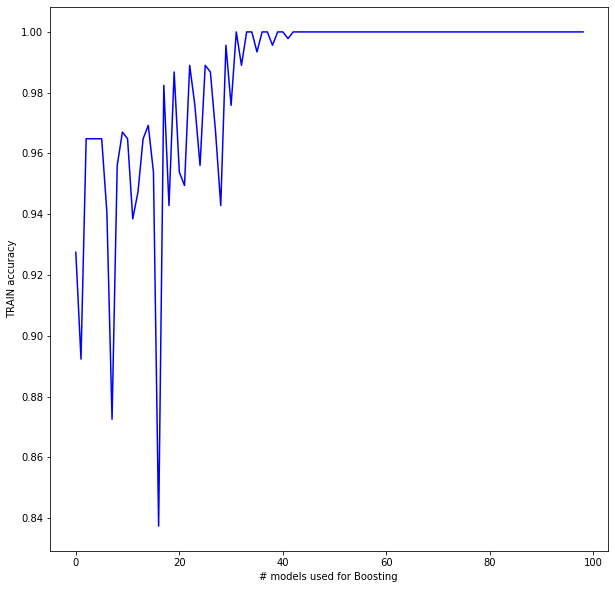

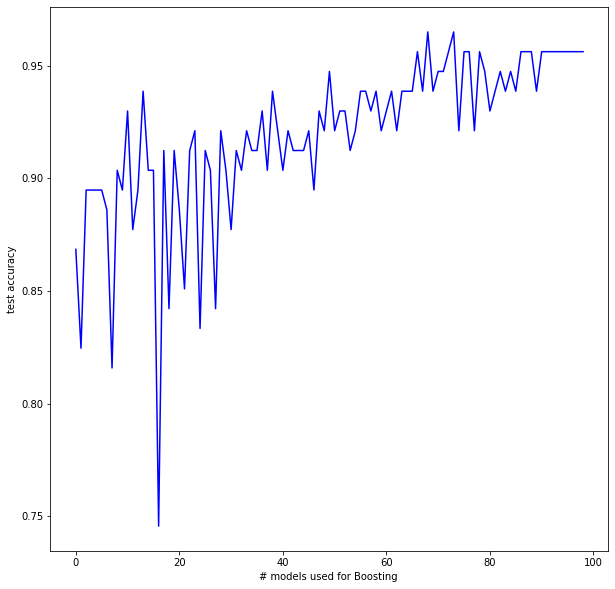

In [38]:
# Accuracy - number of base learners plot for training data

number_of_base_learners = 100

fig = plt.figure(figsize=(10,10))
fig2 = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax1 = fig2.add_subplot(111)

model = AdaBoost(X_train,y_train,number_of_base_learners,X_train,y_train)
for i in range(1,number_of_base_learners):
    model.fit(i)
    model.predict(X_train, y_train,"train")
    model.predict(X_test, y_test,"test")
    
print("100 accuracy in :",model.accuracy.index(1))

ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('TRAIN accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1] * 100,'%')    


ax1.plot(range(len(model.accuracy_test)),model.accuracy_test,'-b')
ax1.set_xlabel('# models used for Boosting ')
ax1.set_ylabel('test accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',max(model.accuracy_test) * 100,'%')    

plt.show()   
#################################################################### 
# TODO: Plot Accuracy - number of base learners plot for test data #
####################################################################


# Feature Selction </br>

## problem4. Filtering : correlation coefficient (25 points)


In [46]:
################################################################################# 
# TODO:                                                                         #
# use 80% of normalized data as train and 20% as test data.(just use the data   # 
# from last part)                                                               #
# 1- compute the correlation coefficient between each feature and target.       #
# 2- Report the features that their correlation is more than 0.5                #
# 3- compute the correlation between the features you reported in 2nd           #
# section and report features that their correlation with other features        #
# is less than 0.5                                                              #
# 4- use perceptron from sklearn package to classify the data. Report accurracy #
# for test data and sort the features based on their weights in perceptron.     #
# IMPORTANT: Don't forget to add 1s to the end of feature vectors to be         #
# multiplied by bias term of weight in perceptron.                              #
# 5- compare the features you reported in section 2 and 3 with the features     #
# that have the most weights in perceptron and write your analysis below        #
# 6 - Classify data with perceptron and use only the features you repoted in    # 
# section 2 and report accuracy for test data.                                  #
# 7 - Do the same with section 3 and compare accuracies.                        #
#################################################################################
from scipy.stats import pearsonr
from sklearn.linear_model import Perceptron 
#0

X_data = df.drop("target",axis = 1)
X_data = (X_data - X_data.min()) / (X_data.max() - X_data.min())
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=1)

#1

X = pd.DataFrame(X_train)
Xtest = pd.DataFrame(X_test)
corr = X.apply(lambda x: abs(x.corr(df.target)))
# print(corr)

#2
features_num = [n for n, c in enumerate(corr) if c > 0.5]
features_name_2 = [features[i] for i in features_num]

#3
corrs = []
corrs_length = []
for f1 in features_name_2:
    corrs_length.append(len([(abs(pearsonr(X[f1], X[f2])[0]),f2) for f2 in features_name_2 if abs(pearsonr(X[f1], X[f2])[0]) < 0.5]) )
sorted_corrs_index = sorted(range(len(corrs_length)), key=lambda k: corrs_length[k],reverse = True)
selected_features = sorted_corrs_index[:3]
selected_features_name = [features_name_2[i] for i in selected_features] 

#4

new_col = np.array([1 for i in range(len(X_train))]).reshape(len(X_train),1)
X_train = np.append(X_train, new_col, 1)
new_col = np.array([1 for i in range(len(X_test))]).reshape(len(X_test),1)
X_test = np.append(X_test, new_col, 1)
perceptron_model = Perceptron(random_state=10, eta0=0.1e-3)
perceptron_model.fit(X_train, y_train)
weigth = perceptron_model.coef_[0]
pred_test = perceptron_model.predict(X_test)
correct = 0
for i,j in zip(y_test, pred_test) :
    if i == j :
        correct+=1
print("perceptron test accuracy : ", round(correct*100/len(y_test),3) ,"% \n ")
sorted_weigth = sorted(range(len(weigth)), key=lambda k: weigth[k],reverse = True)
perceptron_selected_features_name = [features[i] for i in sorted_weigth if i != 30]


#5
print("#2 feature selections : ", features_name_2,"\n")
print("#3 feature selections : ",selected_features_name,"\n")
print("perceptron features : ",perceptron_selected_features_name,"\n")
in_perceptron2 = [perceptron_selected_features_name.index(i)+1 for i in features_name_2]
in_perceptron3 = [perceptron_selected_features_name.index(i)+1 for i in selected_features_name]

print("\n#2 feature selections features rank in perceptron weights : ",in_perceptron2,"\n")
print("\n#3 feature selections features rank in perceptron weights : ",in_perceptron3,"\n")


#6
new1_X_train = []
new1_X_test = []
for f in features_name_2 :
    new1_X_train.append(X[f])
    new1_X_test.append(Xtest[f])
    
new1_X_train = np.asarray(new1_X_train)
new1_X_train = new1_X_train.reshape(len(X_train),len(features_name_2))
new_col = np.array([1 for i in range(len(X_train))]).reshape(len(X_train),1)
new1_X_train = np.append(new1_X_train, new_col, 1)


new1_X_test = np.asarray(new1_X_test)
new1_X_test = new1_X_test.reshape(len(X_test),len(features_name_2))
new_col = np.array([1 for i in range(len(new1_X_test))]).reshape(len(new1_X_test),1)
new1_X_test = np.append(new1_X_test, new_col, 1)

perceptron_model = Perceptron(random_state=10, eta0=0.1e-3)
perceptron_model.fit(new1_X_train, y_train)
pred_test = perceptron_model.predict(new1_X_test)
correct = 0
for i,j in zip(y_test, pred_test) :
    if i == j :
        correct+=1
print("\n#6 perceptron test accuracy : ", round(correct*100/len(y_test),3) ,"% \n")

#7
new1_X_train = []
new1_X_test = []
for f in selected_features_name :
    new1_X_train.append(X[f])
    new1_X_test.append(Xtest[f])
    
new1_X_train = np.asarray(new1_X_train)
new1_X_train = new1_X_train.reshape(len(X_train),len(selected_features_name))
new_col = np.array([1 for i in range(len(X_train))]).reshape(len(X_train),1)
new1_X_train = np.append(new1_X_train, new_col, 1)


new1_X_test = np.asarray(new1_X_test)
new1_X_test = new1_X_test.reshape(len(X_test),len(selected_features_name))
new_col = np.array([1 for i in range(len(new1_X_test))]).reshape(len(new1_X_test),1)
new1_X_test = np.append(new1_X_test, new_col, 1)

perceptron_model = Perceptron(random_state=10, eta0=0.1e-3)

perceptron_model.fit(new1_X_train, y_train)
pred_test = perceptron_model.predict(new1_X_test)
correct = 0
for i,j in zip(y_test, pred_test) :
    if i == j :
        correct+=1
print("\n#7 perceptron test accuracy : ", round(correct*100/len(y_test),3) ,"% ")



perceptron test accuracy :  96.491 % 
 
#2 feature selections :  ['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points'] 

#3 feature selections :  ['worst compactness', 'area error', 'worst concavity'] 

perceptron features :  ['mean fractal dimension', 'fractal dimension error', 'compactness error', 'mean symmetry', 'concavity error', 'mean compactness', 'texture error', 'mean smoothness', 'symmetry error', 'smoothness error', 'concave points error', 'worst fractal dimension', 'mean radius', 'mean perimeter', 'worst compactness', 'mean area', 'area error', 'perimeter error', 'radius error', 'worst concavity', 'mean texture', 'worst symmetry', 'mean concavity', 'worst area', 'worst smoothness', 'worst perimeter', 'worst radius', 'mean concave points', 'worst texture', 'worst

explanation of part 5 and 6:


رنک ویژگی هایی که من به دست آورده ام در بخش دو و سه و فیچر هایی که وزن زیادی در پرسپترون داشتند در بالا پرینت شده است.
به طور کلی به نظر می رسد فیچر هایی که از طریق محاسبه ی کورلیشن به دست آمده اند فیچر های خوبی نیستند و اکثرا جز فیچر هایی که در پرسپترون وزن بالایی دارند نمی باشند که این نشان می دهد این شیوه ی انتخاب ویژگی لزوما شیوه ی خوبی نیست و گاهی لزوما ارتباط خطی بین فیچرها نشان دهنده ی اهمیت آن ها برای پردیکت کردن تارگت نیست.


Question: Is it important to extract features before classifying using methods like decision tree and SVM? why? 

بله چون این کار باعث می شودد تا فیچرهای نا مربوط حذف شوند که هم در سرعت اجرای الگوریتم کمک میکند (در تعاد ویژگی های زیاد )و هم اورفیت را کاهش می دهد .

## problem 5. mRMR (10 bonus points) </br>
In this part you should write your own code and classify the data using mRMR method.You can use "pymrmr" package for this part.

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pymrmr
import pandas as pd
from sklearn.linear_model import Perceptron

X_data = df.drop("target",axis = 1)
X_data = (X_data - X_data.min()) / (X_data.max() - X_data.min())
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=1)
X = pd.DataFrame(X_train)

for i in [3,5,7,10,13,15,17,20,25]:
    selected_features_name = pymrmr.mRMR(X, 'MIQ', i)

    new1_X_train = []
    new1_X_test = []
    for f in selected_features_name:
        new1_X_train.append(X[f])
        new1_X_test.append(X_test[f])

    new1_X_train = np.asarray(new1_X_train)
    new1_X_train = new1_X_train.reshape(len(X_train),len(selected_features_name))
    new_col = np.array([1 for i in range(len(X_train))]).reshape(len(X_train),1)
    new1_X_train = np.append(new1_X_train, new_col, 1)


    new1_X_test = np.asarray(new1_X_test)
    new1_X_test = new1_X_test.reshape(len(X_test),len(selected_features_name))
    new_col = np.array([1 for i in range(len(new1_X_test))]).reshape(len(new1_X_test),1)
    new1_X_test = np.append(new1_X_test, new_col, 1)

    perceptron_model = Perceptron(random_state=7,max_iter=500, eta0=0.1)

    perceptron_model.fit(new1_X_train, y_train)
    pred_test = perceptron_model.predict(new1_X_test)
    acc = [1 if y_test[i] == pred_test[i] else 0 for i in range(len(y_test))]

    print(" perceptron test accuracy for  : ",i," number of features from pymrmr", (sum(acc)/len(y_test)) * 100 ,"% ")

 perceptron test accuracy for  :  3  number of features from pymrmr 63.1578947368421 % 
 perceptron test accuracy for  :  5  number of features from pymrmr 57.01754385964912 % 
 perceptron test accuracy for  :  7  number of features from pymrmr 63.1578947368421 % 
 perceptron test accuracy for  :  10  number of features from pymrmr 64.03508771929825 % 
 perceptron test accuracy for  :  13  number of features from pymrmr 38.59649122807017 % 
 perceptron test accuracy for  :  15  number of features from pymrmr 63.1578947368421 % 
 perceptron test accuracy for  :  17  number of features from pymrmr 36.84210526315789 % 
 perceptron test accuracy for  :  20  number of features from pymrmr 56.14035087719298 % 
 perceptron test accuracy for  :  25  number of features from pymrmr 46.49122807017544 % 


در قسمت بالا  با استفاده از لایبرری گفته شده ویژگی ها به دست آمده اند و برای تعداد مختلفی ویژگی که در بالا ذکر شده است دقا پرسپترون گزارش شده است . همانطور که میبینیم این روش انتخاب ویژگی به نظر می رسد که برای این دیتا مناسب نیست و دقت خوبی به ما نمی دهد.